# Math for ML: Basic Linear Algebra

In this lesson I'll introduce the basics of linear algebra, particularly vectors and matrices. Linear algebra at its root is the study of systems of linear equations and the spaces their solutions lie in, called vector spaces. Along with calculus, linear algebra is probably the most important area of mathematics for real-world applications, including machine learning. Let's get started.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from utils.math_ml import *

In [2]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams["figure.figsize"] = (4, 3)

## Systems of Linear Equations

You're certainly familiar by now with solving a simple linear equation. Suppose you need to solve the linear equation $ax=b$ for $x$. Provided $a \neq 0$, you can divide both sides by $a$ to get 

$$x = \frac{b}{a} = a^{-1} b.$$

Suppose now you need to solve not just one, but two coupled linear equations. Here's an example. Let's try to solve for the variables $x$ and $y$ that would simultaneously solve *both* of the following equations,

$$
\begin{alignat*}{2}
   x & {}+{} &  y & {}={} & 2  \\
   x & {}-{} &  y & {}={} & 0.
\end{alignat*}
$$

If you stare at it for a second, you'll see that what we want is two numbers that add to two, but subtract to zero. The second equation implies they must be the same number, i.e. $x=y$. If this is true, the first equation must then imply $x=y=1$. In fact, this is the *only* solution to this linear system. No other choice of $x$ and $y$ will work.

This is an example of a linear system of equations with 2 linear equations and 2 unknowns ($x$ and $y$). These have the form

$$
\begin{alignat*}{2}
   ax & {}+{} &  by & {}={} & e \\
   cx & {}+{} &  dy & {}={} & f.
\end{alignat*}
$$

Systems with 2 equations and 2 unknowns will always have a unique solution provided the coefficients $ad \neq bc$, given by

$$
\begin{align*}
x &= \frac{de-bf}{ad-bc} \\
y &= \frac{af-ce}{ad-bc}.
\end{align*}
$$

If you don't believe me, plug these in to check they satisfy the linear system. Or ask sympy.

In [3]:
x, y = sp.symbols('x y')
a, b, c, d, e, f = sp.symbols('a b c d e f')
eq1 = sp.Eq(a * x + b * y, e)
eq2 = sp.Eq(c * x + d * y, f)
sol = sp.solve((eq1, eq2), (x, y))
sol[x]
sol[y]

(-b*f + d*e)/(a*d - b*c)

(a*f - c*e)/(a*d - b*c)

It's worth plotting what these equations look like to try to visualize what's going on. In the simple case of 2 variables we can do that. In the above example with solution $x=y=1$, solving each equation for $y$ as a function of $x$ gives

$$
\begin{align*}
y &= 2-x \\
y &= x.
\end{align*}
$$

If we plot these two lines, the point where they intersect is $(1,1)$, i.e. the solution to the system found above. Feel free to play around with different choices of $a,b,c,d,e,f$ to see what happens. What you're doing is varying the slopes and intercepts of both of the lines. Varying any of these will change the location of the point of intersection, i.e. the solution to the linear system. The special case where both have the same slope is when $ad=bc$. This is when the two lines are parallel. Since parallel lines don't intersect, these systems have no solution.

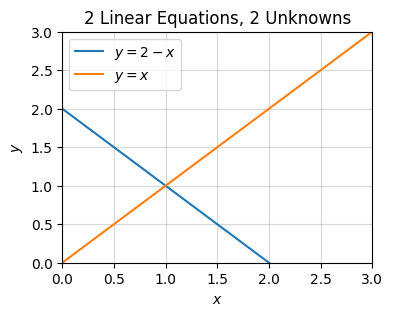

In [4]:
a, b, e = 1, 1, 2
c, d, f = 1, -1, 0
x = np.linspace(-3, 3, 100)
f0 = lambda x: -a / b * x + e / b
f1 = lambda x: -c / d * x + f / d
plot_function(x, [f0, f1], xlim=(0, 3), ylim=(0, 3), title='2 Linear Equations, 2 Unknowns',
              labels=[f'$y=2-x$', f'$y=x$'])

Suppose now the system you needed to solve had a third variable $z$, like this

$$
\begin{alignat*}{2}
   x & {}+{} &  y & {}+{} & z {}={} & 2  \\
   x & {}-{} &  y & {}+{} & z {}={} & 0.
\end{alignat*}
$$

This is a system of 2 linear equations with 3 unknowns ($x$, $y$, and $z$). Does it have a solution? Clearly it does. If we set $z=0$ then the original solution $x=y=1$ still works, so $x=1, y=1, z=0$ is a solution to this system. But is it the *only* solution? No, *any* solution of the form $x=1-c, y=1, z=c$ will work for *any* real number $c$. If you don't believe me, pick any choice of $c$ you want and plug it in, and it'll solve this system. Said differently, this system has *infinitely many solutions*.

This fact will be true for any system of 2 equations with 3 unknowns. The system is *underdetermined*, meaning it has too many variables to solve for. There will always be one that's *free*, in the sense that we can set it to be whatever we want.

Here's a plot of what this situation looks like. Since there are 3 variables I'll have to use a 3D plot. Notice that now we don't have 2 intersecting *lines*, but 2 intersecting *planes*. Two planes intersect at a line, not a point. Any point on this line is a valid solution to this underdetermined linear system.

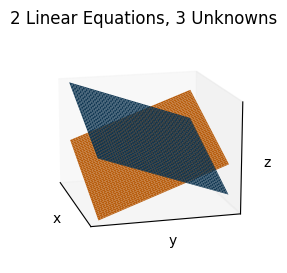

In [5]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
f1 = lambda x, y: 2 - x - y
f2 = lambda x, y: y - x
plot_3d(x, y, [f1, f2], azim=-15, elev=15, show_ticks=False, title='2 Linear Equations, 3 Unknowns')

The final case to mention involves 2 linear equations and 1 unknown. Suppose you needed to solve the same equation, but this time only $x$ is a variable,

$$
\begin{alignat*}{2}
   x {}={} & 2  \\
   x {}={} & 0.
\end{alignat*}
$$

This one is clearly impossible, since $x$ can't be both $2$ and $0$ at the same time. This system has *no solution*. It's called an *overdetermined system*. There are too many equations and too few variables.

Everything I've said for 2 linear equations extends to arbitrarily many linear equations. Suppose we have a system of $m$ linear equations with $n$ unknown variables $x_0, x_1, \cdots, x_{n-1}$,

$$
\begin{array}{c<{x_1} C c<{x_2} C c C c<{x_n} C l}
a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} & = & b_0 \\
a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} & = & b_1 \\
\vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots    &   & \vdots\\
a_{m-1,0}x_0 & + & a_{m-1,1}x_1 & + & \cdots & + & a_{m-1,n-1}x_{n-1} & = & b_{m-1} \\
\end{array}.
$$

This system will have,
- A unique solution if $m=n$, provided the coefficients $a_{i,j}$ satisfy a non-singularity condition (more on that later),
- Infinitely many solutions if $m < n$, i.e. the system is underdetermined,
- No solution if $m > n$, i.e. the system is overdetermined.

## Matrix-Vector Notation

These systems of linear equations are incredibly tedious to write out and analyze as is for all but the simplest cases of like two or three equations. There's a cleaner notation for working with these things. Here's what we can do. We have 3 separate types of objects showing up in these equations:
- The $m \cdot n$ coefficients $a_{0,0}, a_{0,1}, \cdots, a_{m-1,n-1}$.
- The $n$ unknown variables $x_0, x_1, \cdots, x_{n-1}$.
- The $m$ constant terms $b_0, b_1, \cdots, b_{m-1}$.

Let's put each of these three objects inside their own arrays and write the linear system as

$$
\begin{pmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n-1} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n-1} \\
\vdots  & \vdots  & \ddots & \vdots    \\
a_{m-1,0} & a_{m-1,1} & \cdots & a_{m-1,n-1}
\end{pmatrix}
\begin{pmatrix}
x_0 \\ x_1 \\ \vdots \\ x_{n-1}
\end{pmatrix} =
\begin{pmatrix}
b_0 \\ b_1 \\ \vdots \\ b_{m-1}
\end{pmatrix}.
$$

We'll *define* this notation to mean exactly the same thing as writing out the full system of linear equations. The array of coefficients is a rank-2 array of shape $(m,n)$. We'll call this an $m \times n$ **matrix**, denoted by a bold-face $\mathbf{A}$. The array of unknowns is a rank-2 array of shape $(n,1)$. Though technically also a matrix, we'll call an array of this shape a **column vector** of size $n$, denoted by a bold-face $\mathbf{x}$. The array of constants is also a rank-2 array of shape $(m,1)$. We'll call this a column vector of size $m$, denoted by a bold-face $\mathbf{b}$. In this sleek notation, our complicated system of $m$ linear equations with $n$ unknowns can be written

$$\mathbf{A} \mathbf{x} = \mathbf{b}.$$

For example, the 3 systems we considered above can be written in matrix-vector notation as

$$
\begin{alignat*}{2}
   x & {}+{} &  y & {}={} & 2  \\
   x & {}-{} &  y & {}={} & 0
\end{alignat*} \quad \Longrightarrow \quad
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix} =
\begin{pmatrix}
2 \\
0
\end{pmatrix},
$$

$$
\begin{alignat*}{2}
   x & {}+{} &  y & {}+{} & z {}={} & 2  \\
   x & {}-{} &  y & {}+{} & z {}={} & 0
\end{alignat*} \quad \Longrightarrow \quad
\begin{pmatrix}
1 & 1 & 1 \\
1 & -1 & 1
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix} =
\begin{pmatrix}
2 \\
0 \\
\end{pmatrix},
$$

$$
\begin{alignat*}{2}
   x {}={} & 2  \\
   x {}={} & 0
\end{alignat*} \quad \Longrightarrow \quad
\begin{pmatrix}
1 \\
1
\end{pmatrix}
\begin{pmatrix}
x
\end{pmatrix} =
\begin{pmatrix}
2 \\
0
\end{pmatrix}.
$$

It may not be at all obvious, but having written a linear system as a matrix-vector equation, I've implicitly defined a new kind of array multiplication. To see this, I'll define a new column vector that I'll call $\mathbf{A} \mathbf{x}$ whose elements are just the left-hand side of the linear system when written out,

$$
\mathbf{A} \mathbf{x} = 
\begin{pmatrix}
a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} \\
a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} \\
\vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots     \\
a_{m-1,0}x_0 & + & a_{m-1,1}x_1 & + & \cdots & + & a_{m-1,n-1}x_{n-1} \\
\end{pmatrix}.
$$

Setting the $i$<sup>th</sup> row of $\mathbf{A} \mathbf{x}$ equal to the $i$<sup>th</sup> row of $\mathbf{b}$ must imply that each $b_i$ can be written

$$b_i = a_{i,0}x_0 + a_{i,1}x_1 + \cdots + a_{i,n-1}x_{n-1} = \sum_{k=0}^{n-1} a_{i,k}x_k.$$

That is, each constant term $b_i$ is the sum of the products of the $i$<sup>th</sup> row of the matrix $\mathbf{A}$ with the vector $\mathbf{x}$. This is **matrix-vector multiplication**, a special case of matrix multiplication, which I'll get to shortly.

Here's a quick example, where a $2 \times 3$ matrix $\mathbf{A}$ is matrix multiplied with a size $3$ vector $\mathbf{x}$. For each row we're element-wise multiplying that row of $\mathbf{A}$ with the vector $\mathbf{x}$ and then summing up the terms. The output will be the vector $\mathbf{b}$ of size $2$.

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = 
\begin{pmatrix}
1 \cdot 1 + 2 \cdot 1 + 3 \cdot 1 \\
4 \cdot 1 + 5 \cdot 1 + 6 \cdot 1 \\
\end{pmatrix} = 
\begin{pmatrix}
6 \\
15
\end{pmatrix}.
$$

Here's a better way of thinking about what matrix-vector multiplication is. Notice that the $m \times n$ matrix $\mathbf{A}$ consists of $n$ columns each containing $m$ elements. We can think of each of these $n$ columns as a *vector* of size $m$. They're called the **column vectors** of $\mathbf{A}$. If $\mathbf{a}_0, \mathbf{a}_1, \cdots, \mathbf{a}_{n-1}$ are the $n$ column vectors of $\mathbf{A}$, we can write

$$
\mathbf{A}=
\begin{pmatrix}
\mathbf{a}_0 & \mathbf{a}_1 & \cdots & \mathbf{a}_{n-1}
\end{pmatrix}.
$$

In the previous example, the column vectors of $\mathbf{A}$ are the 3 size-2 vectors

$$\mathbf{a}_0 = \binom{1}{4}, \quad \mathbf{a}_1 = \binom{2}{5}, \quad \mathbf{a}_2 = \binom{3}{6}.$$

In this notation, matrix-vector multiplication is just a sum of the column vectors of $\mathbf{A}$, but with each column $\mathbf{a}_j$ weighted by some $x_j$,

$$
\mathbf{A} \mathbf{x} =
\begin{pmatrix}
\mathbf{a}_0 & \mathbf{a}_1 & \cdots & \mathbf{a}_{n-1}
\end{pmatrix}
\begin{pmatrix}
x_0 \\
x_1 \\
\cdots \\
x_{n-1}
\end{pmatrix} =
x_0 \mathbf{a}_0 + x_1 \mathbf{a}_1 + \cdots x_{n-1} \mathbf{a}_{n-1}.
$$

This is called a **linear combination**. A linear combination is a weighted sum of a bunch of vectors. That is, the matrix-vector product $\mathbf{A} \mathbf{x}$ is a linear combination of the column vectors of the matrix $\mathbf{A}$, weighted by the vector $\mathbf{x}$. In the above example, this would look like

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = 1 \cdot \binom{1}{4} + 1 \cdot \binom{2}{5} + 1 \cdot \binom{3}{6} = \binom{1+2+3}{4+5+6} = \binom{6}{15}.
$$

## Matrix Multiplication

While I'm on the topic, I'll go ahead and define **matrix multiplication** for two matrices $\mathbf{A}$ and $\mathbf{B}$ as well. If $\mathbf{A}$ is $m \times n$ and $\mathbf{B}$ is $n \times p$, define the matrix product $\mathbf{C}=\mathbf{A}\mathbf{B}$ as the $m \times p$ matrix $\mathbf{C}$ whose elements are given by

$$C_{i,j} = \sum_{k=0}^{n-1} A_{i,k} B_{k,j} = A_{i,0} B_{0,j} + A_{i,1} B_{1,j} + \cdots + A_{i,n-1} B_{n-1,j}.$$

Note matrix multiplication is always expressed symbolically by directly concatenating the two matrix symbols next to each other like $\mathbf{A}\mathbf{B}$.

Here's an example where $\mathbf{A}$ is $3 \times 3$ and $\mathbf{B}$ is $3 \times 2$. The output matrix $\mathbf{C}$ will be $3 \times 2$.

$$
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
\end{pmatrix}
\begin{pmatrix}
    6 & 5 \\
    4 & 3 \\
    2 & 1 \\
\end{pmatrix} = 
\begin{pmatrix}
   1\cdot 6+2\cdot 4+3\cdot 2 & 1\cdot 5+2\cdot 3+3\cdot 1 \\
   4\cdot 6+5\cdot 4+6\cdot 2 & 4\cdot 5+5\cdot 3+6\cdot 1 \\
   7\cdot 6+8\cdot 4+9\cdot 2 & 7\cdot 5+8\cdot 3+9\cdot 1 \\
\end{pmatrix} = 
\begin{pmatrix}
   20 & 14 \\
   56 & 41 \\
   92 & 68 \\
\end{pmatrix}.
$$

**Aside:** If you're having a hard time visualizing what matrix multiplication is doing, [here](http://matrixmultiplication.xyz/) is an online interactive tool that some have find helpful.

Note matrix multiplication is only defined when the numbers of *columns* in $\mathbf{A}$ equals the number of *rows* of $\mathbf{B}$. We say matrices satisfying this condition are **compatible**. If they can't be multiplied, they're called **incompatible**.

Also note that matrix multiplication does not **commute**. That is, we can't swap the order of the two matrices being multiplied, $\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}$. Try to multiply the above example in the opposite order and see what happens. The two matrices won't even be compatible anymore.

Matrix multiplication can be thought of as a kind of extension to matrix-vector multiplication, where instead of just trying to solve one linear system, we're trying to solve a bunch of them in parallel, but all having the same coefficients $\mathbf{A}$. Suppose we want to simultaneously solve the systems of equations

$$\mathbf{A}\mathbf{x}_0=\mathbf{b}_0, \quad \mathbf{A}\mathbf{x}_1=\mathbf{b}_1, \quad \cdots, \quad \mathbf{A}\mathbf{x}_{p-1}=\mathbf{b}_{p-1}.$$

What we can do is create two matrices $\mathbf{X}$ and $\mathbf{B}$ by making column vectors out of each $\mathbf{x}_j$ and $\mathbf{b}_j$,

$$
\begin{align*}
\mathbf{X} &=
\begin{pmatrix}
\mathbf{x}_0 & \mathbf{x}_1 & \cdots & \mathbf{x}_{n-1}
\end{pmatrix}, \\
\mathbf{B} &=
\begin{pmatrix}
\mathbf{b}_0 & \mathbf{b}_1 & \cdots & \mathbf{b}_{m-1}
\end{pmatrix}.
\end{align*}
$$

Then the bunch of linear systems we're trying to solve is just the matrix product $\mathbf{A}\mathbf{X}=\mathbf{B}$. Each column $\mathbf{A}\mathbf{x}_j=\mathbf{b}_j$ can again be thought of as a linear combination of the columns of $\mathbf{A}$, but with each column weighted by its own vector $\mathbf{x}_j$.

### Algorithm Analysis

Matrix multiplication is perhaps the single most important mathematical operation in machine learning. It's so important I'm going to write a function to code it from scratch before showing how to do it in numpy. I'll also analyze the speed of the algorithm in FLOPS and the memory in terms of word size. Algorithmically, all matrix multiplication is doing is looping over every single element of $\mathbf{C}$ and performing the sum-product calculation above for each $C_{i,j}$. Here's a function `matmul` that takes in two numpy arrays `A` and `B` and multiplies them, returning the product `C` if the dimensions are compatible.

In [6]:
def matmul(A, B):
    assert A.shape[1] == B.shape[0]
    m, n, p = A.shape[0], A.shape[1], B.shape[1]
    C = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

In [7]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); print(f'A = \n{A}')
B = np.array([[6, 5], [4, 3], [2, 1]]); print(f'B = \n{B}')
C = matmul(A, B); print(f'C = AB = \n{C.astype(A.dtype)}')

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B = 
[[6 5]
 [4 3]
 [2 1]]
C = AB = 
[[20 14]
 [56 41]
 [92 68]]


Let's take a quick look at what this function is doing complexity wise. First off, we're pre-computing the output matrix $\mathbf{C}$. That'll contribute $O(mp)$ memory since $\mathbf{C}$ is $m \times p$. All of the FLOPS are happening inside the double loop over $m$ and $p$. For each $i,j$ pair, the function performing $n$ total multiplications and $n-1$ total additions, i.e. $2n-1$ FLOPs per $i,j$ pair. Since we're doing this $m \times p$ times, that gives $m \cdot p \cdot (2n-1)$ total FLOPS, or to leading order $O(mnp)$ FLOPS. Matrix multiplication is an example of a *cubic time* algorithm since if $n=m=p$ we'd have a cubic leading order of $O(n^3)$ FLOPS.

**Aside:** People have found algorithms that can matrix multiply somewhat faster than cubic time. For example, [Strassen's algorithm](https://en.wikipedia.org/wiki/Strassen_algorithm) can matrix multiply in about $O(n^{2.8})$ time. Matrices that have special forms, e.g. banded matrices or sparse matrices, have special algorithms that can multiply them even faster, for example by using the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform). These special algorithms have their uses, but it remains the case that practically speaking most matrix multiplication is best done using the naive cubic time algorithm.

Cubic time may seem fast, but it's really not unless the matrices are relatively small (say $n \leq 1000$ or so). For this reason, a lot of effort has gone into making matrix multiplication run highly efficiently on hardware, mostly by parallelizing the function above, optimizing blocks to take advantage of meory, and compiling operations down to low-level C or FORTRAN code. In fact, it's no exaggeration to say that the entire reason the deep learning revolution over the past decade happened because people found ways to multiply matrices much faster by using GPUs.

Anyway, we'd never want to implement matrix multiplication natively in python like this. It's far too slow. In practice we'd use `np.matmul(A, B)` to matrix multiply. A cleaner notation is to use the special `@` symbol for matrix multiplication, in which case we can just write `A @ B`.

In [8]:
A @ B

array([[20, 14],
       [56, 41],
       [92, 68]])

### Matrix Multiplication vs Element-Wise Multiplication

We've already seen a different way we can multiply two matrices (or any array), namely element-wise multiplication. I'll denote element-wise multiplication as $\mathbf{A} * \mathbf{B}$. This is sometimes called the **Hadamard product**. It's only defined when the shapes of $\mathbf{A}$ and $\mathbf{B}$ are *equal* (or can be broadcasted to be equal).

It's important to mind the difference between matrix multiplication and element-wise multiplication of matrices. In general $\mathbf{A} * \mathbf{B} \neq \mathbf{A} \mathbf{B}$. They're defined completely differently,

$$
(\mathbf{A} * \mathbf{B})_{i,j} = A_{i,j} \cdot B_{i,j} \\
(\mathbf{A} \mathbf{B})_{i,j} = \sum_k A_{i,k}B_{k,j}.
$$

In numpy we'll use `A * B` for element-wise multiplication and `A @ B` for matrix multiplication. To make it clear the two kinds of multiplication aren't the same thing here's an example.

In [9]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 0], [0, 1]])
print(f'A*B = \n{A * B}')
print(f'AB = \n{A @ B}')

A*B = 
[[1 0]
 [0 4]]
AB = 
[[1 2]
 [3 4]]


## Solving Linear Systems

### Square Systems

We can use the idea of matrix multiplication to try to solve a linear system of equations. Suppose we have a system of $n$ linear equations with $n$ unknowns (it's important $m=n$ here),

$$
\begin{array}{c<{x_1} C c<{x_2} C c C c<{x_n} C l}
a_{0,0}x_0 & + & a_{0,1}x_1 & + & \cdots & + & a_{0,n-1}x_{n-1} & = & b_0 \\
a_{1,0}x_0 & + & a_{1,1}x_1 & + & \cdots & + & a_{1,n-1}x_{n-1} & = & b_1 \\
\vdots    &   & \vdots    &   &  \ddots  &   & \quad \vdots    &   & \vdots\\
a_{n-1,0}x_0 & + & a_{n-1,1}x_1 & + & \cdots & + & a_{n-1,n-1}x_{n-1} & = & b_{n-1} \\
\end{array}.
$$

Written in matrix vector notation, we'd like to solve the equation $\mathbf{A}\mathbf{x} = \mathbf{b}$ for the vector $\mathbf{x}$. How do we go about this? Let's look at the simplest cases when $n=1,2$ and see if we can spot a pattern.

When $n=1$, we're just solving the single linear equation $ax=b$, where $a,x,b$ are all real numbers. In this case it's easy, as dividing both sides by $a$ gives $x = a^{-1}b$ when $a \neq 0$.

When $n=2$, we're solving the $2 \times 2$ linear system

$$
\begin{alignat*}{2}
   ax & {}+{} &  by & {}={} & e \\
   cx & {}+{} &  dy & {}={} & f,
\end{alignat*}
$$

which I showed before was given by

$$
\begin{align*}
x &= \frac{de-bf}{ad-bc} \\
y &= \frac{af-ce}{ad-bc},
\end{align*}
$$

provided $ad \neq bc$. Now, if I rewrite this equation in matrix-vector notation, I'd get

$$
\mathbf{A}\mathbf{x} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix} =
\begin{pmatrix}
e \\
f
\end{pmatrix}
= \mathbf{b},
$$

and the solutions would look like

$$
\mathbf{x} = 
\begin{pmatrix}
x \\
y
\end{pmatrix} =
\begin{pmatrix}
\frac{de-bf}{ad-bc} \\
\frac{af-ce}{ad-bc}
\end{pmatrix} =
\begin{pmatrix}
\frac{d}{ad-bc} & -\frac{b}{ad-bc} \\
-\frac{c}{ad-bc} & \frac{a}{ad-bc}
\end{pmatrix}
\begin{pmatrix}
e \\
f
\end{pmatrix} =
\mathbf{A}^{-1} \mathbf{b}.
$$

The matrix on the right I'm calling $\mathbf{A}^{-1}$ because it looks something like the $x=a^{-1}b$ equation from the $n=1$ case. You can verify it gives the right result by matrix multiplying $\mathbf{A}^{-1}$ with $\mathbf{b}$ and confirming it does indeed give the equations for $\mathbf{x}$.

But what exactly does it mean to talk about "dividing by" a matrix? In the $n=1$ case, dividing by $a$ just means that $a a^{-1} = 1$. That is, the two values undo each other when multiplied together. Let's see what undoing a matrix would look like by matrix multiplying $\mathbf{A}\mathbf{A}^{-1}$ when $n=2$,

$$
\mathbf{A}\mathbf{A}^{-1} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\begin{pmatrix}
\frac{d}{ad-bc} & -\frac{b}{ad-bc} \\
-\frac{c}{ad-bc} & \frac{a}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
\frac{ad}{ad-bc}-\frac{bc}{ad-bc} & -\frac{ab}{ad-bc}+\frac{ab}{ad-bc} \\
\frac{cd}{ad-bc}-\frac{dc}{ad-bc} & -\frac{cb}{ad-bc}+\frac{da}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
\frac{ad-bc}{ad-bc} & \frac{ab-ab}{ad-bc} \\
\frac{cd-cd}{ad-bc} & \frac{ad-bc}{ad-bc}
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}.
$$

The term on the right looks and behaves kind of like a $1$. It's called the **identity matrix**, usually written with the symbol $\mathbf{I}$. The matrix $\mathbf{A}^{-1}$ is called the **inverse** of $\mathbf{A}$. It exists whenever its denominator isn't zero, $ad-bc \neq 0$. This denominator is called the **determinant** of $\mathbf{A}$, usually denoted $\text{det}(\mathbf{A})$ or often more simply just $|\mathbf{A}|$ when the meaning is clear.

The exact same idea extends to arbitrary $n \times n$ systems as well. The $n \times n$ identity matrix $\mathbf{I}$ is the matrix whose values are $1$ when $i=j$ and $0$ when $i \neq j$. The terms in a matrix when $i=j$ are called the **diagonal** of the matrix. The terms when $i \neq j$ are called the **off-diagonals**. Thus, the identity matrix is the matrix that takes on the value $1$ on the diagonal and $0$ on the off-diagonals.

If we'd like to solve the system $\mathbf{A}\mathbf{x} = \mathbf{b}$, we could find the inverse of $\mathbf{A}$ somehow, and then get the solution $\mathbf{x}$ by writing $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$, provided its determinant $\text{det}(\mathbf{A}) \neq 0$. A matrix with non-zero determinant is called **invertible**. Invertible matrices have inverses. A matrix with zero determinant are called **singular**. Singular matrices can't be inverted.

Of course, it's no longer obvious at all how to even find $\mathbf{A}^{-1}$ or $\text{det}(\mathbf{A})$ when $n>2$. Thankfully we don't need to cover this for machine learning purposes. I'll just mention that there are efficient algorithms for solving large linear systems like this. You can use `np.linalg.solve(A, b)` to do this, provided $\mathbf{A}$ can be inverted. Here's an example of solving a $3 \times 3$ linear system. You can also get the inverse directly by using `np.linalg.inv(A)`, though you'd rarely actually want to do this. It turns out matrix inversion is a very numerically unstable operation. Try to avoid explicitly calculating matrix inverses if you can.

In [10]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); print(f'A = \n{A}')
b = np.array([[1], [1], [1]]); print(f'b = \n{b}')
x = np.linalg.solve(A, b); print(f'x = \n{x}')

A = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
[[1]
 [1]
 [1]]
x = 
[[ 0.2]
 [-1.4]
 [ 1.2]]


### Rectangular Systems

What about when $m \neq n$? Things become more interesting then. If $m < n$ the linear system is under-determined, and will have infinitely many solutions. In this case, there are infinitely many ways to "invert" $\mathbf{A}$. We just need to find any one of them that will work. If $m > n$ the linear system is over-determined, and will have no exact solution. We can however find an *approximate* solution by looking for the $\mathbf{x}$ that most *nearly* solves the linear system. In both cases, a generalization of the inverse exists, called the **pseudoinverse**.

Here's how to find out what the pseudoinverse should be. Let's define a matrix similar to $\mathbf{A}$, but with its rows and columns swapped, called the **transpose** of $\mathbf{A}$. The transpose of $\mathbf{A}$, denoted by the symbol $\mathbf{A}^\top$, is defined by the relationship $A_{i,j}^\top = A_{j,i}$. For example, if $\mathbf{A}$ is the $3 \times 2$ matrix

$$
\mathbf{A} = 
\begin{pmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
\end{pmatrix}, \quad \text{then} \quad
\mathbf{A}^\top = 
\begin{pmatrix}
    1 & 4 \\
    2 & 5 \\
    3 & 6 \\
\end{pmatrix}
$$

is its transpose. The key thing to notice is that if $\mathbf{A}$ is $m \times n$, then $\mathbf{A}^\top$ is $n \times m$. This means that the *product* of the two is square since $\mathbf{A} \mathbf{A}^\top$ is $m \times m$. Note a **square** matrix is a matrix with the same number of rows as columns, i.e. with $m=n$. The product in the opposite order is square too since $\mathbf{A}^\top \mathbf{A}$ is $n \times n$. 

Here's an example. In numpy, we can use `np.transpose(A)`, or more simply `A.T` to get the transpose of a matrix. Notice both of the products $\mathbf{A} \mathbf{A}^\top$ and $\mathbf{A}^\top \mathbf{A}^\top$ are square, but each 

In [11]:
A = np.array([[1, 2, 3], [4, 5, 6]]); print(f'A = \n{A}')
At = A.T; print(f'At = \n{At}')
AAt = A @ At; print(f'A At = \n{AAt}')
AtA = At @ A; print(f'At A = \n{AtA}')

A = 
[[1 2 3]
 [4 5 6]]
At = 
[[1 4]
 [2 5]
 [3 6]]
A At = 
[[14 32]
 [32 77]]
At A = 
[[17 22 27]
 [22 29 36]
 [27 36 45]]


Now, suppose we want to solve an $m \times n$ linear system $\mathbf{A}\mathbf{x} = \mathbf{b}$, where $m \neq n$, i.e. $\mathbf{A}$ isn't square. A non-square matrix is called **rectangular**. We can't invert $\mathbf{A}$ since it isn't square. But what we *can* do is make the linear system square by multiplying both sides on the left by $\mathbf{A}^\top$,

$$\mathbf{A}^\top \mathbf{A}\mathbf{x} = \mathbf{A}^\top \mathbf{b}.$$

Since $\mathbf{A}^\top \mathbf{A}$ is square, it's invertible (provided it's non-singular). Thus, this modified linear system has a solution given by

$$\mathbf{x} = (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top \mathbf{b}.$$

This looks kind of like $\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$. If we define the **pseudoinverse** $\mathbf{A}^+$ by

$$\mathbf{A}^+ = (\mathbf{A}^\top \mathbf{A})^{-1} \mathbf{A}^\top,$$

then we could write the solution to this modified linear system as

$$\mathbf{x} = \mathbf{A}^+ \mathbf{b}.$$

The solution we get from this is called the **least squares solution** to $\mathbf{A}\mathbf{x} = \mathbf{b}$. It's the closest we can get to an exact solution in a certain sense. 

In numpy, you can use `np.linalg.lstsq` to solve such a system. It returns a tuple of values, the first of which is the least squares solution itself, i.e. $\mathbf{x}$. You can also get the pseudoinverse directly by using `np.linalg.pinv(A)`, though you'd rarely actually want to do this.

In the example below I'll take the same $2 \times 3$ matrix $\mathbf{A}$ from the transpose example, and $\mathbf{b}=\binom{1}{1}$. Since $m<n$, this is an under-determined system, so it'll have infinitely many solutions. The least squares solution will find *one* of these possible solutions, which turns out to be

$$
\mathbf{x} = 
\begin{pmatrix}
-\frac{1}{2} \\
0 \\
\frac{1}{2} \\
\end{pmatrix}.
$$

I'll also confirm that indeed $\mathbf{A}\mathbf{x}=\mathbf{b}$ in this case.

In [12]:
A = np.array([[1, 2, 3], [4, 5, 6]]); print(f'A = \n{A}')
b = np.array([1, 1]); print(f'b = \n{b}')
x, _, _, _ = np.linalg.lstsq(A, b, rcond=None); print(f'x = \n{x.round(2)}')
print(f'Ax = \n{A @ x}')

A = 
[[1 2 3]
 [4 5 6]]
b = 
[1 1]
x = 
[-0.5 -0.   0.5]
Ax = 
[1. 1.]


## Vector Spaces

I've introduced matrices and vectors so far kind of organically as the natural way to write and solve systems of linear equations. They're good for a lot more than solving linear systems, however. For one thing, they possess important geometric properties. I'm now going to re-define the concepts covered so far, but in more geometric terms. 

### Visualizing Vectors

Let's go back to the simple 2-dimensional case. Imagine you have a point in the xy-plane, call it $(x,y)$. Now, we can think of this as a single point, but we can also imagine it differently. Suppose there was an arrow pointing from the origin $(0,0)$ to the point $(x,y)$. For example, if the point was $(1,1)$, this arrow might look like this.

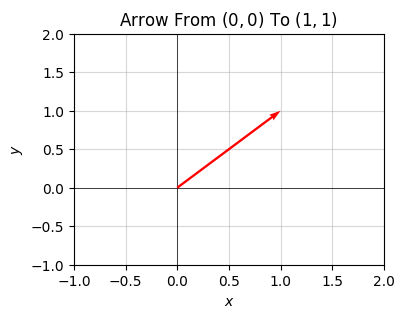

In [13]:
point = np.array([1, 1])
plot_vectors(point, title=f'Arrow From $(0,0)$ To $(1,1)$', ticks_every=0.5)

Unlike the *point* $(x,y)$, the *arrow* $(x,y)$ has both a length and a direction. Its length is given by the Pythagorean Theorem. If the triangle has base $x$ and height $y$, then the length of the arrow is just its hypotenuse, i.e. $r = \sqrt{x^2 + y^2}$. The direction of the arrow is its angle $\theta$ with respect to the x-axis. This angle is just given by the inverse tangent of height over base, i.e. $\theta = \tan^{-1}\big(\frac{y}{x}\big)$. 

In the example plotted, the length is $r=\sqrt{1+1}=\sqrt{2}$, and the angle is $\theta = \tan^{-1}(1) = 45^\circ$. These two values uniquely specify the arrow, assuming it starts at the origin. If we know the length and direction, we know exactly which arrow we're talking about.

What I've just shown is another way to define a vector. A **vector** is an arrow in the plane. Said differently, a vector is just a point that's also been endowed with a length (or magnitude) and a direction. The x and y values are called **components** of a vector. Usually we'll write a vector in bold-face and its components in regular type but with subscripts indicating which component. For example, $\mathbf{v}=(v_x,v_y)$. Here's the same arrow I plotted above, but explicitly labeled as a vector $\mathbf{v}=(1,1)$. Its components are $v_x=1$ and $v_y=1$.

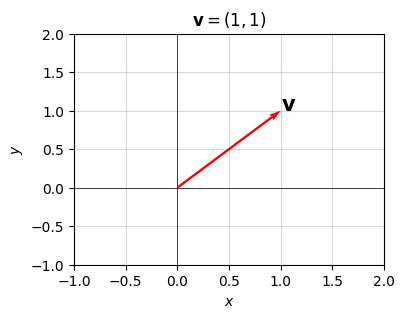

In [14]:
v = np.array([1, 1])
plot_vectors(v, title='$\mathbf{v}=(1,1)$', labels=['$\mathbf{v}$'], ticks_every=0.5)

The magnitude, or length, of $\mathbf{v}$ is typically denoted by the symbol $||\mathbf{v}||$, called a **norm**,

$$||\mathbf{v}|| = \sqrt{v_x^2 + v_y^2}.$$

In the above example with $\mathbf{v}=(1,1)$, its norm is $||\mathbf{v}||=\sqrt{1+1}=\sqrt{2} \approx 1.414$.

What happens if we scale a $\mathbf{v}$ by some scalar, say $c$? By the rules of scalar-vector multiplication, the new vector should be $c\mathbf{v}=(cx,cy)$. Since the new vector has length $||c\mathbf{v}||$, a little math shows that

$$||c\mathbf{v}|| = \sqrt{(cv_x)^2 + (cv_y)^2} = \sqrt{c^2(v_x^2 + v_y^2)} = |c| \sqrt{v_x^2 + v_y^2} = |c| \cdot ||\mathbf{v}||.$$

That is, the re-scaled vector $c\mathbf{v}$ just gets its length re-scaled by $c$. That's why $c$ is called a scalar. It rescales vectors. Notice if $c$ is negative, the length stays the same, but the direction gets reversed $180^\circ$ since in that case $c\mathbf{v} = c(v_x, v_y) = -|c|(v_x,v_y)$.

Here's what vector scaling looks like geometrically. I'll plot the vector $\mathbf{v}=(1,1)$ again, but scaled by two numbers, one $c=2$, the other $c=-1$. When $c=2$, the vector just doubles its length. That's the light blue arrow. When $c=-1$, the vector reverses its direction $180^\circ$, but maintains its length since $|c|=1$. That's the light orange arrow.

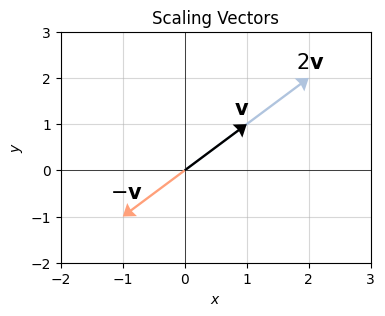

In [15]:
v = np.array([1, 1])
plot_vectors([v, -v, 2*v], xlim=(-2,3), ylim=(-2,3), title=f'Scaling Vectors', headwidth=7, ticks_every=1,
             labels=['$\mathbf{v}$', '$-\mathbf{v}$', '$2\mathbf{v}$'], 
             colors=['black', 'lightsalmon', 'lightsteelblue'],
             text_offsets=[[-0.2, 0.2], [-0.2, 0.4], [-0.2, 0.2]])

What does adding two vectors do? Let $\mathbf{v}=(v_x,v_y)$ and $\mathbf{w}=(w_x,w_y)$ be two vectors in the plane. Then their sum is $\mathbf{v}+\mathbf{w} = (v_x+w_x,v_y+w_y)$. I'll plot an example below with $\mathbf{v}=(1,1)$ and $\mathbf{w}=(1,3)$. Their sum should be 

$$\mathbf{v}+\mathbf{w}=(1+1,1+3)=(2,4).$$

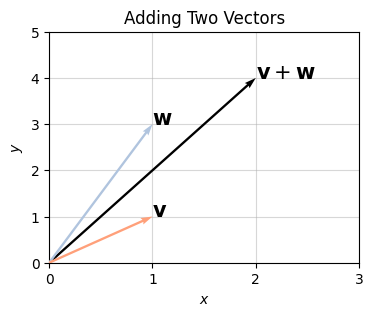

In [16]:
v = np.array([1, 1])
w = np.array([1, 3])
plot_vectors([v, w, v + w], xlim=(0, 3), ylim=(0, 5), title=f'Adding Two Vectors', ticks_every=1,
             labels=['$\mathbf{v}$', '$\mathbf{w}$', '$\mathbf{v}+\mathbf{w}$'], 
             colors=['lightsalmon', 'lightsteelblue', 'black'])

It may not be obvious yet what vector addition is doing geometrically. Let me plot it slightly differently. What I'll do is plot the vectors "head to tail" by taking the *tail* of $\mathbf{w}$ and placing it at the *head* of $\mathbf{v}$. Then the head of this translated $\mathbf{w}$ vector points at the head of the sum $\mathbf{v}+\mathbf{w}$.

Informally speaking, to add two vectors, just stack them on top of each other head to tail, and draw an arrow from the starting point to the ending point. You can geometrically add arbitrarily many vectors this way, not just two. Just keep stacking them.

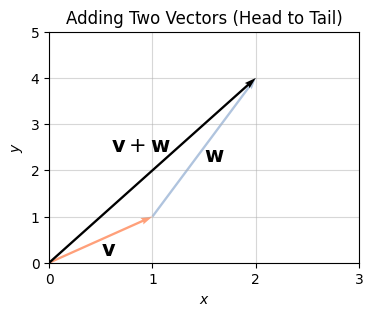

In [17]:
plot_vectors([v, w, v + w], xlim=(0, 3), ylim=(0, 5), title=f'Adding Two Vectors (Head to Tail)',
             colors=['lightsalmon', 'lightsteelblue', 'black'],
             tails=[[0, 0], [v[0], v[1]], [0, 0]], text_offsets=[[-0.5, -0.85], [0.5, -0.8], [-1.4, -1.6]],
             labels=['$\mathbf{v}$', '$\mathbf{w}$', '$\mathbf{v}+\mathbf{w}$'],
             zorders = [0, 1, 2], ticks_every=1)

What about subtracting two vectors? By combining the rules for scalar multiplication and vector addition, you can convince yourself that the difference of two vectors is also element-wise, 

$$\mathbf{v}-\mathbf{w} = (v_x-w_x,v_y-w_y).$$

To visualize what subtracting two vectors looks like, notice we can write subtraction as a sum like this,
$\mathbf{w} + (\mathbf{v}-\mathbf{w}) = \mathbf{v}$. Now use the same trick for adding vectors, only this time placing $(\mathbf{v}-\mathbf{w})$ at the head of $\mathbf{w}$, and noticing that it points to the sum of the two, which is $\mathbf{v}$.

An easy way to remember what subtracting two vectors looks like is to connect the two vectors you're subtracting with a line segment, and place the head on the first vector. This trick will never fail you.

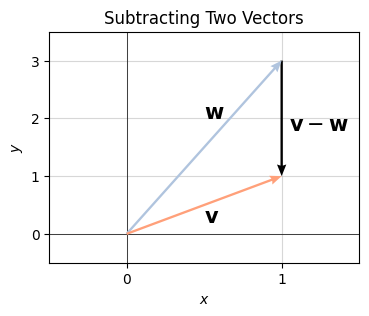

In [18]:
v = np.array([1, 1])
w = np.array([1, 3])
plot_vectors([v, w, v - w], xlim=(-0.5, 1.5), ylim=(-0.5, 3.5), title=f'Subtracting Two Vectors', headwidth=4,
             ticks_every=1, colors=['lightsalmon', 'lightsteelblue', 'black'],
             tails=[[0, 0], [0, 0], [w[0], w[1]]], text_offsets=[[-0.5, -0.8], [-0.5, -1], [1.05, 3.8]],
             labels=['$\mathbf{v}$', '$\mathbf{w}$', '$\mathbf{v}-\mathbf{w}$'])

### The Dot Product

It turns out we can understand both the lengths and angles of vectors in terms of a single operation called the **dot product**, also called the inner or scalar product. The dot product is a kind of multiplication between two vectors that returns a scalar. If $\mathbf{v}=(v_x,v_y)$ and $\mathbf{w}=(w_x,w_y)$ are two vectors in the plane, their dot product is defined as

$$\mathbf{v} \cdot \mathbf{w} = v_x w_x + v_y w_y.$$

That is, the dot product is just the sum of the element-wise products of the two vectors. In terms of vectorized numpy code, the dot product is just the operation `np.sum(v * w)`. Numpy also has a convenience function `np.dot(v, w)` that calculates it directly. Here's the calculation of the dot product between the two vectors $\mathbf{v}=(5,-1)$ and $\mathbf{w}=(2,4)$. The answer should be 

$$\mathbf{v} \cdot \mathbf{w} = 5 \cdot 2 + (-1) \cdot 4 = 10 - 4 = 6.$$

In [19]:
v = np.array([5, -1])
w = np.array([2, 4])
np.sum(v * w)
np.dot(v, w)

6

6

We can write the norm or length of a vector in terms of the dot product. Observe that by dotting $\mathbf{v}$ with itself, I get

$$\mathbf{v} \cdot \mathbf{v} = v_x^2 + v_y^2 = ||\mathbf{v}||^2.$$

Taking the square root of both sides, you can see that the norm or length of a vector is just the square root of its dot product with itself,

$$||\mathbf{v}|| = \sqrt{\mathbf{v} \cdot \mathbf{v}}.$$

We can similarly express the angle of a vector with the x-axis in terms of the dot product. Let $\mathbf{e}_x=(1,0)$ by the vector of length 1 pointing along the x-axis. Vectors of length 1 are called **unit vectors**, since they have unit length.

Then the dot product between these two vectors is just the component $v_x$ along the x-axis since

$$\mathbf{v} \cdot \mathbf{e}_x = v_x \cdot 1 + v_y \cdot 0 = v_x.$$ 

The vector $v_x \mathbf{e}_x = (v_x,0)$ gotten by rescaling $\mathbf{e}_x$ by the component $v_x$ is called the **projection** of $\mathbf{v}$ onto the x-axis. It's the vector you'd get by dropping $\mathbf{v}$ perpendicular to the x-axis. Here's what this looks like when $\mathbf{v}=(0.5,1)$. In that case, the projection is $v_x \mathbf{e}_x=(0.5, 0)$.

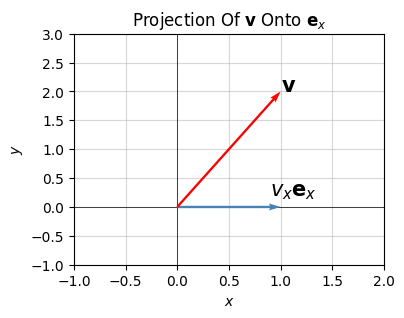

In [20]:
v = np.array([1, 2])
ex = np.array([1, 0])
plot_vectors([v, v[0] * ex], title='Projection Of $\mathbf{v}$ Onto $\mathbf{e}_x$', ticks_every=0.5,
             text_offsets=[[0, 0], [-0.1, 0.2]], colors=['red', 'steelblue'],
             labels=['$\mathbf{v}$', '$v_x \mathbf{e}_x$'])

Now, you may or may not recall from high school trigonometry that the ratio of the base of a right triangle to its hypotenuse is just the cosine of the angle between them (adjacent over hypotenuse). Since $||\mathbf{v}||$ is the the hypotenuse and $v_x$ is the base, that means

$$\cos \theta = \frac{\text{adjacent}}{\text{hypotenuse}} = \frac{v_x}{||\mathbf{v}||},$$

or equivalently $v_x = \mathbf{v} \cdot \mathbf{e}_x = ||\mathbf{v}|| \cos \theta$. 

I can of course do exactly the same thing with the y-axis too. If $\mathbf{e}_y = (0,1)$ is the unit vector along the y-axis, then the component of $\mathbf{v}$ along the y-axis is just $v_y = \mathbf{v} \cdot \mathbf{e}_y$. This time, the same angle $\theta$ between base and hypotenuse is given by the *sine* of the angle (opposite over hypotenuse), i.e.

$$\sin \theta = \frac{\text{opposite}}{\text{hypotenuse}} = \frac{v_y}{||\mathbf{v}||},$$

or equivalently $v_y = \mathbf{v} \cdot \mathbf{e}_y = ||\mathbf{v}|| \sin \theta$. 

I've thus shown something interesting. We can write the vector $\mathbf{v}$ as a linear combination of the two perpendicular unit vectors $\mathbf{e}_x$ and $\mathbf{e}_y$,

$$\mathbf{v} = v_x \mathbf{e}_x + v_y\mathbf{e}_y = (\mathbf{v} \cdot \mathbf{e}_x)\mathbf{e}_x + (\mathbf{v} \cdot \mathbf{e}_y)\mathbf{e}_y.$$

This is true for *any* vector $\mathbf{v}$ in the plane. Said differently, the pair of vectors $\mathbf{e}_x$ and $\mathbf{e}_y$ form what's called a **basis** for the vector space $\mathbb{R}^2$. Two vectors $\mathbf{a}$ and $\mathbf{b}$ form a basis for $\mathbb{R}^2$ if we can decompose any vector $\mathbf{v} \in \mathbb{R}^2$ into some linear combination of the basis vectors,

$$\mathbf{v} = v_a\mathbf{a} + v_b\mathbf{b}.$$

The basis consisting of the two vectors $\mathbf{e}_x$ and $\mathbf{e}_y$ is special though in that it satisfies two useful properties:
1. Both $\mathbf{e}_x$ and $\mathbf{e}_y$ have unit length. That is, the basis vectors are **normalized**.
2. Their dot product is $\mathbf{e}_x \cdot \mathbf{e}_y=0$. That is, the basis vectors are **orthogonal**.

A basis satisfying these two properties is called an **orthonormal basis**. An orthonormal basis is special in that it allows us to pick out the components of a vector directly by just taking dot products with the basis vectors. It's only true for an orthonormal basis that we can write,

$$
\begin{align*}
v_x &= \mathbf{v} \cdot \mathbf{e}_x, \\
v_y &= \mathbf{v} \cdot \mathbf{e}_y.
\end{align*}
$$

Here's what this looks like for the vector $\mathbf{v}=(1.25,2)$. Notice the two basis vectors are $90^\circ$ from each other. That's no coincidence. It follows from the fact that $\mathbf{e}_x \cdot \mathbf{e}_y=0$. You'll see why in a second.

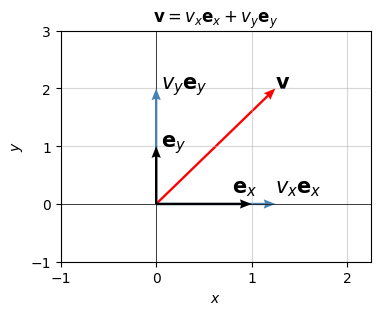

In [21]:
v = np.array([1.25, 2])
ex = np.array([1, 0])
ey = np.array([0, 1])
plot_vectors(
    [v, v[0] * ex, v[1] * ey, ex, ey], colors=['red', 'steelblue', 'steelblue', 'black', 'black'], 
    ticks_every=1, zorders=[0, 1, 2, 3, 4, 5], headwidth=4,
    text_offsets=[[0,0], [0,0.2], [0.05,0], [-0.2,0.2], [0.05,0]],
    title='$\mathbf{v}=v_x \mathbf{e}_x + v_y \mathbf{e}_y$', 
    labels=['$\mathbf{v}$', '$v_x \mathbf{e}_x$', '$v_y \mathbf{e}_y$', '$\mathbf{e}_x$', '$\mathbf{e}_y$'])

Note the pair $\mathbf{e}_x$ and $\mathbf{e}_y$ isn't the only orthonormal basis for $\mathbb{R}^2$ we could choose. For example, the vectors $\mathbf{a}=\frac{1}{\sqrt{2}} (1,1)$ and $\mathbf{b}=\frac{1}{\sqrt{2}} (-1,1)$ also form an orthonormal basis. In this basis, $\mathbf{v}=(1.25, 2)$ would be written

$$\mathbf{v} = (\mathbf{v} \cdot \mathbf{a}) \mathbf{a} + (\mathbf{v} \cdot \mathbf{b}) \mathbf{b} \approx 2.298 \mathbf{a} + 0.530 \mathbf{b}.$$

That's a very different representation for $\mathbf{v}$. In fact, there are infinitely many orthonormal bases for $\mathbb{R}^2$. Just take any two perpendicular vectors in the plane and normalize them to unit length and they'll form an orthonormal basis for $\mathbb{R}^2$.

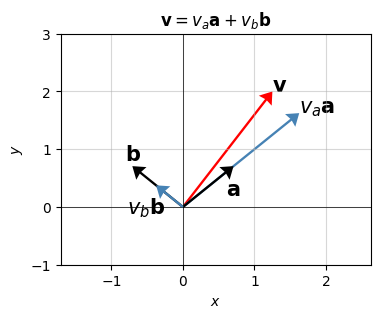

In [22]:
v = np.array([1.25, 2])
a = np.array([1, 1]) / np.sqrt(2)
b = np.array([-1, 1]) / np.sqrt(2)
plot_vectors(
    [v, np.dot(v, a) * a, np.dot(v, b) * b, a, b], colors=['red', 'steelblue', 'steelblue', 'black', 'black'], 
    ticks_every=1, zorders=[0, 1, 5, 3, 4, 2], headwidth=7,
    text_offsets=[[0, 0], [0, 0], [-0.4, -0.5], [-0.1, -0.5], [-0.1, 0.1]],
    title='$\mathbf{v}=v_a \mathbf{a} + v_b \mathbf{b}$', 
    labels=['$\mathbf{v}$', '$v_a \mathbf{a}$', '$v_b \mathbf{b}$', '$\mathbf{a}$', '$\mathbf{b}$'])

### Cosine Similarity

It turns out that we can express the angle between *any* two vectors in the plane using a similar trick. If $\theta$ is the angle between two vectors $\mathbf{v}$ and $\mathbf{w}$, then

$$\mathbf{v} \cdot \mathbf{w} = ||\mathbf{v}|| \cdot ||\mathbf{w}|| \cos \theta.$$

Note that both sides of this equation are scalars since the dot product is a scalar and the product of norms is a scalar. I won't prove this formula here. You can do it using trigonometry, a topic which I've declined to cover because it doesn't really show up in machine learning. The idea here is to use the [Law of Cosines](https://en.wikipedia.org/wiki/Law_of_cosines) on the norm of the difference vector $||\mathbf{v}-\mathbf{w}||$, then equate that with what you get from the dot product of the same difference vector.

It's more common to express this formula with $\cos \theta$ on one side and the vector terms on the other so you can solve for the angle (or more commonly just the cosine of the angle). In this case, we have

$$\cos \theta = \frac{\mathbf{v} \cdot \mathbf{w}}{||\mathbf{v}|| \cdot ||\mathbf{w}||}.$$

What matters more than anything is what this formula says and how to use it. Suppose, for example, you want to find the angle between the two vectors $\mathbf{v} = (1,1)$ and $\mathbf{w} = (0, -1)$. Then you'd have 

$$
\begin{align*}
\mathbf{v} \cdot \mathbf{w} &= 1 \cdot 0 + 1 \cdot (-1) = -1, \\
||\mathbf{v}|| &= \sqrt{1^2 + 1^2} = \sqrt{2}, \\
||\mathbf{w}|| &= \sqrt{0^2 + (-1)^2} = 1.
\end{align*}
$$

Plugging this into the cosine formula gives,

$$
\cos \theta = \frac{-1}{\sqrt{2}} \quad \Longrightarrow \quad \theta = \cos^{-1}\bigg(\frac{-1}{\sqrt{2}}\bigg) = 135^\circ.
$$

You can verify this is correct by plotting the two vectors and confirming that they're about $135^\circ$ from each other, which corresponds to about 1.25 quarter turns around a circle.

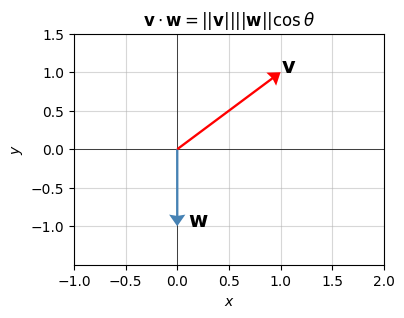

In [23]:
v = np.array([1, 1])
w = np.array([0, -1])
plot_vectors([v, w], title='$\mathbf{v} \cdot \mathbf{w} = ||\mathbf{v}||||\mathbf{w}|| \cos \\theta$', 
             text_offsets=[[0, 0], [0.1, 0]], ticks_every=0.5, xlim=(-1, 2), ylim=(-1.5, 1.5),
             labels=['$\mathbf{v}$', '$\mathbf{w}$'], colors=['red', 'steelblue'], headwidth=7)

In machine learning, this formula for $\cos \theta$ is called **cosine similarity**. The reason for this is that the dot product itself is a measure of how similar two vectors are. To see why, notice what happens if,
- Two vectors are parallel: Then $\cos \theta = \pm 1$, so $\mathbf{v} \cdot \mathbf{w} = \pm ||\mathbf{v}||||\mathbf{w}||$. This is as large as the dot product between two vectors can get (in absolute value), since $\cos \theta$ can never be larger than 1 (in absolute value).
- Two vectors are perpendicular: Then $\cos \theta = 0$, so $\mathbf{v} \cdot \mathbf{w} = 0$. That is, $\mathbf{v}$ and $\mathbf{w}$ are **orthogonal**. This is as small as the dot product between two vectors can get (in absolute value), since $\cos \theta$ can't be smaller than 0 (in absolute value).

Two vectors being parallel to each other in some sense means they're very similar. Up to a scalar multiple, they contain the same information. Whereas two vectors being perpendicular means they share pretty much no information. Information about one vector tells you basically nothing about the other.

The cosine similarity is just a normalized dot product, since dividing by the norms forces $-1 \leq \cos \theta \leq 1$. It thus captures the same idea of similarity that the dot product does, but it's more useful when the lengths of vectors get out of control. This is particularly likely to happen in high dimensions, when $n >> 2$. This is the so-called "curse of dimensionality". We'll come back to this idea in future lessons.

Here's a quick implementation of the cosine similarity function using numpy. There's no built-in function to do it, but it's easy enough to implement by making judicious use of the `np.dot` function. It should give the same answer found above for $\cos \theta$, which is $-\frac{1}{\sqrt{2}} \approx -0.707$.

In [24]:
def cosine_similarity(v, w):
    return np.dot(v, w) / np.sqrt(np.dot(v, v) * np.dot(w, w))

cosine_similarity(v, w)

-0.7071067811865475

### Other Norms

It turns out that the norm I defined above is only *one* way to measure the length of a vector. It's the most natural way to do so sense it corresponds to your intuitive notions of length, which itself relates to the Pythagorean Theorem. There are other ways to quantify vector length as well that aren't as intuitive. Because they do sometimes show up in machine learning I'll briefly mention a couple of these here.

The norm I've covered is called the **2-norm**. It's called this because it involves squares and square roots, which means we can write it in the form

$$||\mathbf{v}|| = ||\mathbf{v}||_2 = \big(v_x^2 + v_y^2 \big)^{1/2}.$$

It turns out we can replace the twos with any other positive number $p>1$ to get generalized norms, called **p-norms**,

$$||\mathbf{v}||_p = \big(v_x^p + v_y^p \big)^{1/p}.$$

The p-norms cover a large class of norms, since any $1 \leq p \leq \infty$ can define a valid norm. The 2-norm, as you'd guess, occurs when $p=2$. A couple of other norms that show up in machine learning are when $p=1$ and $p=\infty$. These norms are defined (in the two-dimensional case) by

$$
\begin{align*}
||\mathbf{v}||_1 &= |v_x| + |v_y|, \\
||\mathbf{v}||_\infty &= \max\big(|v_x|, |v_y|\big).
\end{align*}
$$

Here's an example. I'll calculate the $p=1, 2, \infty$ norms for the vector $\mathbf{v}=(1,-2)$. We have,

$$
\begin{align*}
||\mathbf{v}||_1 &= |1| + |-2| = 1 + 2 = 3, \\
||\mathbf{v}||_2 &= \sqrt{1^2 + (-2)^2} = \sqrt{1 + 4} = \sqrt{5} \approx 2.236, \\
||\mathbf{v}||_\infty &= \max\big(|1|, |-2|\big) = \max(1, 2) = 2.
\end{align*}
$$

Notice that $||\mathbf{v}||_1 \geq ||\mathbf{v}||_2 \geq ||\mathbf{v}||_\infty$. This is a general fact. 

It's a little hard right now to describe why these norms are useful in machine learning since we don't currently have the context. Just know that these norms do come up sometimes. I'll go into more depth on the uses of these different norms as we apply them. In practice though, we'll probably work with the regular 2-norm maybe 90% of the time.

In numpy, you can calculate any $p$-norm using the function `np.linalg.norm(v, ord=p)`. Here's an example.

In [25]:
v = np.array([1, -2])
print(f'1-Norm: {np.linalg.norm(v, ord=1)}')
print(f'2-Norm: {np.linalg.norm(v, ord=2)}')
print(f'Infinity-Norm: {np.linalg.norm(v, ord=np.inf)}')

1-Norm: 3.0
2-Norm: 2.23606797749979
Infinity-Norm: 2.0


## Linear Maps

So where do matrices fit into all this vector space stuff? It turns out that matrices correspond to functions between vectors to vectors. These are called **linear maps**. A linear map is a vector-valued function from one vector space to another that preserves the properties of vectors. In $\mathbb{R}^2$, a linear map is a function between vectors $\mathbf{v}=(v_x,v_y)$ and $\mathbf{w}=(w_x,w_y)$ of the form

$$\mathbf{w} = (w_x, w_y) = (av_x + bv_y, cv_x + dv_y) = \mathbf{F}(\mathbf{v}).$$

That is, each component of the output vector $\mathbf{w}$ is a linear combination of the input vector $\mathbf{v}$. Now, if you stare at this function for a little bit, you should see that this kind of looks like a $2 \times 2$ system of linear equations,

$$
\begin{alignat*}{2}
   av_x & {}+{} &  bv_y & {}={} & w_x \\
   cv_x & {}+{} &  dv_y & {}={} & w_y
\end{alignat*}.
$$

This of course means the linear map is equivalent to a matrix-vector equation. If we identify $\mathbf{v}$ and $\mathbf{w}$ with $2 \times 1$ column vectors, and define a $\mathbf{A}$ by

$$
\mathbf{A} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix},
$$

then the linear map $\mathbf{w} = \mathbf{F}(\mathbf{v})$ is equivalent to the matrix-vector equation $\mathbf{A}\mathbf{v}=\mathbf{w}$, or

$$\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v}.$$

In fact, *every* linear map $\mathbf{F}(\mathbf{v})$ can be identified with some matrix equation $\mathbf{A}\mathbf{v}$. Knowing $\mathbf{A}$ (in some basis) is equivalent to knowing the linear map itself.

But why are linear maps important? The main reason is that they preserve linear structure. Notice that I can define a line through any vector $\mathbf{v}$ by scaling it with some parameter $t$. If I apply a linear map to this line I'd get $\mathbf{F}(t\mathbf{v}) = t\mathbf{F}(\mathbf{v})$. Check it yourself from the definition. Said differently, linear maps map lines to lines, thus preserving the linear structure of the vector space. The new line won't usually be the *original* line. It may get rotated. But it's still a line.

Let's try to visualize what a linear map does by defining a particular $2 \times 2$ matrix $\mathbf{A}$ and seeing how it acts on inputs $\mathbf{v}$. Why stop there? Let's apply the linear map a whole bunch of times recursively and see what happens to the output vectors $\mathbf{w}$. I'll plot each of the $k=63$ vectors in the following sequence,

$$\mathbf{v}, \mathbf{A}\mathbf{v}, \mathbf{A}^2\mathbf{v}, \cdots, \mathbf{A}^{63}\mathbf{v},$$

Note each $A^k$ here is a *matrix power*, defined by applying *matrix multiplication* over and over $k$ times. It's *not* the element-wise power.

For the particular values in this plot I'll choose $\mathbf{v}=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$ and $\mathbf{A}=\begin{pmatrix} 1 & -0.1 \\ 0.1 & 1 \end{pmatrix}$. The original vector $\mathbf{v}$ is colored black. Notice that each linear map is slowly rotating the vector counterclockwise and also slightly stretching it. By the time it gets back around it's already maybe 40% longer than the original vector.

In fact, *every* linear map between two vectors in the plane will do at least one of these two things: rotate the input vector in the plane, or stretch (or shrink) it by some factor. I just chose a particularly nice one to plot.

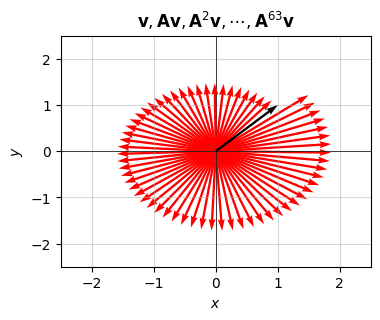

In [26]:
A = np.array([[1, -0.1], [0.1, 1]])
v = np.array([1, 1]).reshape(-1, 1)
k = 63
vectors = [(np.linalg.matrix_power(A, i) @ v).flatten() for i in range(k)]
title = f"""
$\mathbf{{v}}, \mathbf{{A}}\mathbf{{v}}, \mathbf{{A}}^2\mathbf{{v}}, \cdots, \mathbf{{A}}^{{{k}}}\mathbf{{v}}$
""".strip()
plot_vectors(vectors, colors=['black']+['red']*(k-1), title=title, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

What do you suppose the transpose of $\mathbf{A}$ does in this particular example? That is, suppose you use $\mathbf{A}^\top$ instead. Notice what would happen is the minus sign would move from the upper right to the lower left. You can verify that this will just cause the matrix to spin vectors the other way, clockwise instead of counterclockwise.

Two other special linear maps worth being aware of are the identity map and the inverse map. The identity map is the map $\mathbf{F}(\mathbf{v}) = \mathbf{I}\mathbf{v}$. What does it do to $\mathbf{v}$? Let's see. We can get the identity matrix in numpy using `np.eye(n)`, where `n` is the dimension (in this case 2).

It looks like nothing is happening. That is, $\mathbf{I}\mathbf{v} = \mathbf{v}$. You can verify this by writing this out in components and seeing what the matrix-vector product is. In fact, $\mathbf{I}\mathbf{v} = \mathbf{v}$ is *always* true, for any dimension, and any vector $\mathbf{v}$.

**Aside:** Notice that I had to *flatten* the vectors here to do the plot. That's because I've sneakily defined vectors in two different ways, first as a *column* vector of shape $(2,1)$ and *then* as a "flat" vector of shape $(2,)$. It's common to abuse notation like this in math, but do be careful to get the shapes right when coding this stuff or you'll get shape mismatch errors.

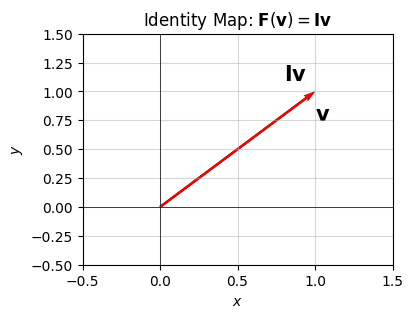

In [27]:
I = np.eye(2)
plot_vectors([v.flatten(), (I @ v).flatten()], zorders=[0, 1],
             title='Identity Map: $\mathbf{F}(\mathbf{v})=\mathbf{I}\mathbf{v}$',
             labels=['$\mathbf{v}$', '$\mathbf{I}\mathbf{v}$'],
             colors=['black', 'red'], xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), 
             text_offsets=[[0, -0.25], [-0.2, 0.1]])

The inverse map is just the linear map that undoes the original linear map $\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v}$, i.e.

$$\mathbf{F}^{-1}(\mathbf{v}) = \mathbf{A}^{-1}\mathbf{v}.$$

You can see what this does by applying the two maps in succession. Here's an example of doing this with the vector $\mathbf{v}=(1,1)$ and the $90^\circ$ rotation matrix

$$\mathbf{A}=\begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}.$$

Applying $\mathbf{F}(\mathbf{v})$ followed by $\mathbf{F}^{-1}(\mathbf{v})$ just gives the same vector $\mathbf{v}$ back. This just follows from the fact that $\mathbf{A}^{-1}\mathbf{A}=\mathbf{I}$, so the composition $\mathbf{F}^{-1}(\mathbf{F}(\mathbf{v}))=\mathbf{v}$.

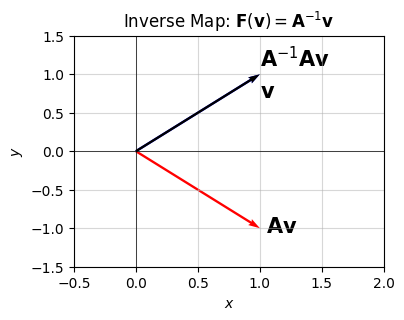

In [28]:
A = np.array([[0, 1], [-1, 0]])
plot_vectors([v.flatten(), (A @ v).flatten(), (np.linalg.inv(A) @ A @ v).flatten()], zorders=[2, 1, 0],
             title='Inverse Map: $\mathbf{F}(\mathbf{v})=\mathbf{A}^{-1}\mathbf{v}$',
             labels=['$\mathbf{v}$', '$\mathbf{A}\mathbf{v}$', '$\mathbf{A}^{-1}\mathbf{A}\mathbf{v}$'],
             colors=['black', 'red', 'blue'], xlim=(-0.5, 2), ylim=(-1.5, 1.5), 
             text_offsets=[[0, -0.3], [0.05, -0.05], [0, 0.1]])

In fact, we've learned something new here and kind of deep. Matrix multiplication is *equivalent* to the composition of linear maps! If $\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v}$ and $\mathbf{G}(\mathbf{w}) = \mathbf{B}\mathbf{w}$ are two linear maps, then their composite function $\mathbf{G}(\mathbf{F}(\mathbf{v}))$ is another linear map given by

$$\mathbf{G}(\mathbf{F}(\mathbf{v})) = \mathbf{B}\mathbf{A}\mathbf{v}.$$

This is the *real* reason matrix multiplication is important. Because linear maps are important, and applying multiple linear maps is just matrix multiplication!

I'll close this section by mentioning that we're often not interested in *linear maps* in practice, but *affine maps*. An **affine map** is just a linear map shifted by some vector $\mathbf{b}$, often called a **bias vector** in machine learning,

$$\mathbf{F}(\mathbf{v}) = \mathbf{A}\mathbf{v} + \mathbf{b}.$$

The only difference between an affine map and a linear map is that vectors will get not just scaled and rotated, but also translated by $\mathbf{b}$ on each step. Here's the same of recursive matrix powers, but this time with a bias vector included. I'll take a bias vector of $\mathbf{b}=\binom{0}{-0.8}$.

Notice what's happening now is that all the output vectors are getting shifted downward by $-0.8$ at every step. You can see that the center of mass of all the vectors seems to be shifted down, distorting the somewhat circular spiral shape from before.

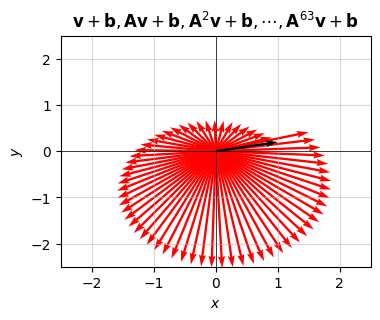

In [29]:
A = np.array([[1, -0.1], [0.1, 1]])
v = np.array([1, 1]).reshape(-1, 1)
b = np.array([0, -0.8]).reshape(-1, 1)
k = 63
vectors = [(np.linalg.matrix_power(A, i) @ v + b).flatten() for i in range(k)]
title = f"""
$\mathbf{{v}} + \mathbf{{b}}, \mathbf{{A}}\mathbf{{v}} + \mathbf{{b}}, 
\mathbf{{A}}^2\mathbf{{v}} + \mathbf{{b}}, \cdots, \mathbf{{A}}^{{{k}}}\mathbf{{v}} + \mathbf{{b}}$
""".replace('\n', '')
plot_vectors(vectors, colors=['black']+['red']*(k-1), title=title, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

## $n$-dimensional Vector Spaces

It may seem like everything I've said is special for the case of $n=2$ dimensions, but it's really not. Every single thing I've said extends exactly how you'd expect to vectors of arbitrary size $n$. The only difference now is that you can't visualize the stuff anymore. You just have to trust the math. I'll restate all of the definitions from above here, but for $n$-dimensional vector spaces instead.

A **vector** of size $n$ can be defined as a 1-dimensional array of real numbers $x_0,x_1,x_2,\cdots,x_{n-1}$,

$$\mathbf{x} = (x_0,x_1,x_2,\cdots,x_{n-1}).$$

Vectors can be added together, and multiplied by scalars. Vector addition is defined element-wise. If $\mathbf{x}$ and $\mathbf{y}$ are two vectors, then

$$\mathbf{x} + \mathbf{y} = (x_0+y_0, x_1+y_1, \cdots, x_{n-1}+y_{n-1}).$$

Scalar multiplication is defined similarly. If $c \in \mathbb{R}$ is some scalar and $\mathbf{x}$ is some vector, then

$$c\mathbf{x} = (cx_0,cx_1,\cdots,cx_{n-1}).$$

Vectors of size $n$ live in the $n$-dimensional **vector space** $\mathbb{R}^n$. By definition, any **linear combination** of two vectors must also live in the same vector space. That is, if $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$ are two vectors and $a,b \in \mathbb{R}$ are two scalars, then $a \mathbf{x} + b \mathbf{y} \in \mathbb{R}^n$.

The **dot product** between two vectors $\mathbf{x}$ and $\mathbf{y}$ of size $n$ is defined as their sum product, i.e.

$$\mathbf{x} \cdot \mathbf{y} = x_0y_0 + x_1y_1 + \cdots + x_{n-1}y_{n-1}.$$

The **norm** (technically the **2-norm**) of a vector is defined as the square root of its dot product with itself, i.e.

$$||\mathbf{x}|| = ||\mathbf{x}||_2 = \sqrt{\mathbf{x} \cdot \mathbf{x}} = \sqrt{x_0^2 + x_1^2 + \cdots + x_{n-1}^2}.$$

This is just the $n$-dimensional generalization of the Pythagorean Theorem. We can also consider other $p$ norms as well. In particular, the cases when $p=1$ and $p=\infty$ sometimes show up in applications,

$$
\begin{align*}
||\mathbf{x}||_1 &= \sum_{i=0}^{n-1} |x_i| = |x_0| + |x_1| + \cdots + |x_{n-1}|, \\
||\mathbf{x}||_\infty &= \max_{i=0,\cdots,n-1} |x_i| = \max\big(|x_0|, |x_1|, \cdots, |x_{n-1}|\big).
\end{align*}
$$

It will always be the case that $||\mathbf{x}||_1 \geq ||\mathbf{x}||_2 \geq ||\mathbf{x}||_\infty$.

We can define the angle between any two vectors $\mathbf{x}$ and $\mathbf{y}$ of size $n$ by making use of the same identity for the dot product, which still holds in $n$ dimensions,

$$\mathbf{x} \cdot \mathbf{y} = ||\mathbf{x}|| \cdot ||\mathbf{y}|| \cos \theta.$$

Using this identity, we can define the **cosine similarity** by solving for $\cos \theta$,

$$\cos \theta = \frac{\mathbf{x} \cdot \mathbf{y}}{||\mathbf{x}|| \cdot ||\mathbf{y}||}.$$

The dot product is a measure of how similar two vectors are, and the cosine similarity is a *normalized* measure of how similar two vectors are, since dividing by the norms forces $-1 \leq \cos \theta \leq 1$.

We can define an **orthonormal basis** on the vector space $\mathbb{R}^n$ by defining the following set of $n-1$ unit vectors each of size $n$,

$$
\begin{align*}
\mathbf{e}_0 &= (1, 0, 0, \cdots, 0), \\
\mathbf{e}_1 &= (0, 1, 0, \cdots, 0), \\
\vdots \ &= \qquad \vdots \\
\mathbf{e}_{n-1} &= (0, 0, 0, \cdots, 1).
\end{align*}
$$

To be an orthonormal basis, each vector in the set must be a unit vector, and it must be mutually orthogonal with *every* other vector in the set. A complete set of basis vectors is said to **span** the vector space $\mathbb{R}^n$.

Any vector $\mathbf{x}$ can be decomposed into a linear combination of these basis elements. Each component $x_i$ will be given by the dot product $\mathbf{x} \cdot \mathbf{e}_i$,

$$\mathbf{x} = \sum_{i=0}^{n-1} (\mathbf{x} \cdot \mathbf{e}_i) \mathbf{e}_i = \sum_{i=0}^{n-1} x_i \mathbf{e}_i = x_0 \mathbf{e}_0 + x_1 \mathbf{e}_1 + \cdots x_{n-1} \mathbf{e}_{n-1}.$$

A **linear map** is a vector-valued function $\mathbf{y}=\mathbf{F}(\mathbf{x})$ between vector spaces that preserves the linear structure of the spaces. In general, $\mathbf{x} \in \mathbb{R}^m$ and $\mathbf{y} \in \mathbb{R}^n$ need not be in the same vector spaces. Either way, a linear map can always be expressed as a matrix-vector equation $\mathbf{y}=\mathbf{A}\mathbf{x}$, where $\mathbf{A}$ is some $m \times n$ matrix. More generally, an **affine map** is a linear map shifted by some **bias vector** $\mathbf{b} \in \mathbb{R}^m$. Affine maps can always be expressed as a matrix-vector equation shifted by a bias, $\mathbf{y}=\mathbf{A}\mathbf{x} + \mathbf{b}$.

Just as with linear maps in the plane, linear maps always preserve lines. Not just lines in fact, but planes and hyperplanes as well. These generalizations of lines are called **linear subspaces**. If 
$$t_1\mathbf{x}_1 + t_2\mathbf{x}_2 + \cdot + t_{k-1}\mathbf{x}_{k-1}$$ 

is some $k$-dimensional linear subspace of $\mathbb{R}^n$, then its image under a linear map will be some new $k$-dimensional subspace, but in $\mathbb{R}^m$,

$$t_1\mathbf{F}(\mathbf{x}_1) + t_2\mathbf{F}(\mathbf{x}_2) + \cdot + t_{k-1}\mathbf{F}(\mathbf{x}_{k-1}).$$

Linear maps in higher dimensions also correspond to scaling and rotation vectors in $n$-dimensions. However, if $m \neq n$, a linear map *also* maps vectors into some new dimensional space. If $m > n$ the map is called an **embedding**. If $m < n$ the map is called a **projection**.